In [356]:
import numpy as np
import pandas as pd

In [357]:
df = pd.read_csv("E:\project\sms_spam.csv")
df

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [358]:
df.shape

(5559, 2)

In [359]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [361]:
df.sample(5)

,type,text
5414,ham,Pls dont forget to study
4762,ham,Any chance you might have had with me evaporat...
3616,ham,Thk some of em find wtc too far... Weiyi not g...
4032,spam,ROMCAPspam Everyone around should be respondin...
4974,ham,Ranjith cal drpd Deeraj and deepak 5min hold


In [362]:
# use label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [363]:
df['type'] = encoder.fit_transform(df['type'])

In [364]:
df.head()

,type,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...


In [365]:
# missing value
df.isnull().sum()

type    0
text    0
dtype: int64

In [366]:
# check duplicate values
df.duplicated().sum()


403

In [367]:
# remove dupicate value
df = df.drop_duplicates(keep='first')

In [368]:
df.duplicated().sum()

0

In [369]:
df.shape

(5156, 2)

# 2. EDA

In [370]:
df.head()

,type,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...


In [371]:
df['type'].value_counts()

0    4503
1     653
Name: type, dtype: int64

In [372]:
import matplotlib.pyplot as plt 

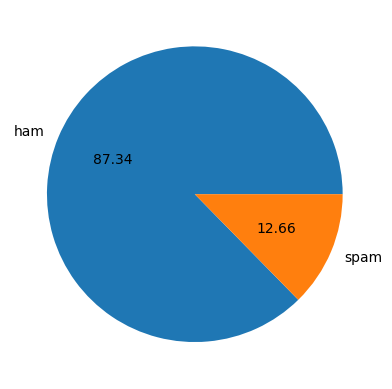

In [373]:
plt.pie(df['type'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [374]:
# Data is Imbalanced

In [375]:
import nltk

In [376]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Laptop
[nltk_data]     Point\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [377]:
# Num of character
df['num_character'] = df['text'].apply(len)

C:\Users\Laptop Point\AppData\Local\Temp\ipykernel_7284\4242420137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_character'] = df['text'].apply(len)


In [378]:
df.head()

,type,text,num_character
0,0,Hope you are having a good week. Just checking in,49
1,0,K..give back my thanks.,23
2,0,Am also doing in cbe only. But have to pay.,43
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,1,okmail: Dear Dave this is your final notice to...,161


In [379]:
# Num of Words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Laptop Point\AppData\Local\Temp\ipykernel_7284\862039062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [380]:
df.head()

,type,text,num_character,num_words
0,0,Hope you are having a good week. Just checking in,49,11
1,0,K..give back my thanks.,23,7
2,0,Am also doing in cbe only. But have to pay.,43,12
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23
4,1,okmail: Dear Dave this is your final notice to...,161,32


In [381]:
# Num of sentences
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Laptop Point\AppData\Local\Temp\ipykernel_7284\4055863538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [382]:
df

,type,text,num_character,num_words,num_sentence
0,0,Hope you are having a good week. Just checking in,49,11,2
1,0,K..give back my thanks.,23,7,1
2,0,Am also doing in cbe only. But have to pay.,43,12,2
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3
4,1,okmail: Dear Dave this is your final notice to...,161,32,3
...,...,...,...,...,...
5554,0,You are a great role model. You are giving so ...,245,61,4
5555,0,"Awesome, I remember the last time we got someb...",88,19,1
5556,1,"If you don't, your prize will go to another cu...",145,32,2
5557,1,"SMS. ac JSco: Energy is high, but u may not kn...",154,36,7


In [383]:
# if we use more df coloums{df[["","",""]]}
df[['num_character', 'num_words', 'num_sentence']].describe()

,num_character,num_words,num_sentence
count,5156.000000,5156.000000,5156.000000
mean,78.658844,18.174166,1.974011
std,57.615904,12.756129,1.458812
min,2.000000,1.000000,1.000000
25%,35.000000,9.000000,1.000000
50%,60.000000,14.000000,1.500000
75%,117.250000,26.000000,2.000000
max,910.000000,196.000000,38.000000


In [384]:
# ham massage (describe)
df[df['type'] == 0][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,4503.000000,4503.000000,4503.000000
mean,70.104375,16.789252,1.827226
std,55.626601,12.810142,1.393931
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,38.000000


In [385]:
df[df['type']==1][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.649311,27.724349,2.986217
std,29.825481,6.988639,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [386]:
import seaborn as sns

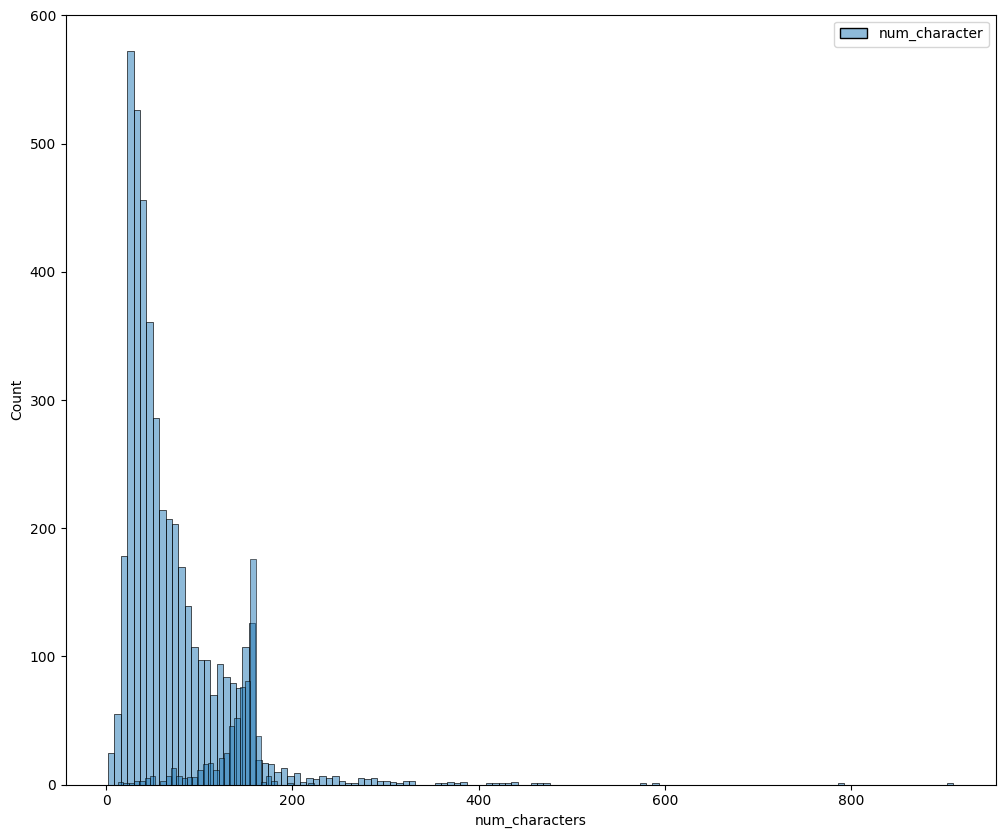

In [387]:
plt.figure(figsize=(12,10))
sns.histplot(df[df['type']==0][['num_character']])
sns.histplot(df[df['type']==1][['num_character']],color="red")
plt.xlabel('num_characters')
plt.show()

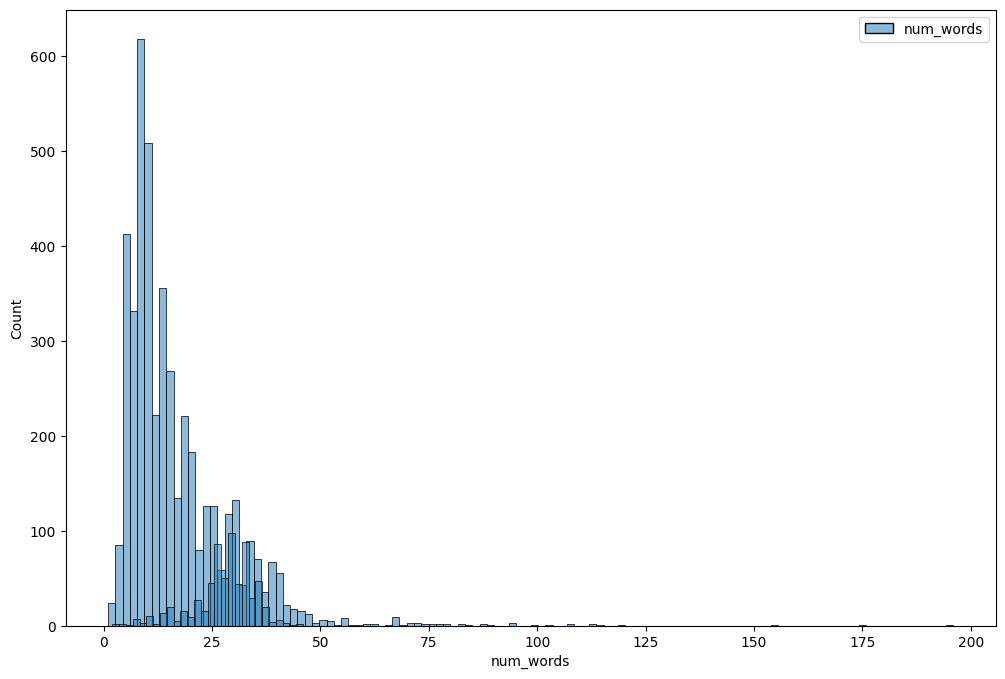

In [388]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['type']==0][['num_words']])
sns.histplot(df[df['type']==1][['num_words']],color="r")
plt.xlabel('num_words')
plt.show()

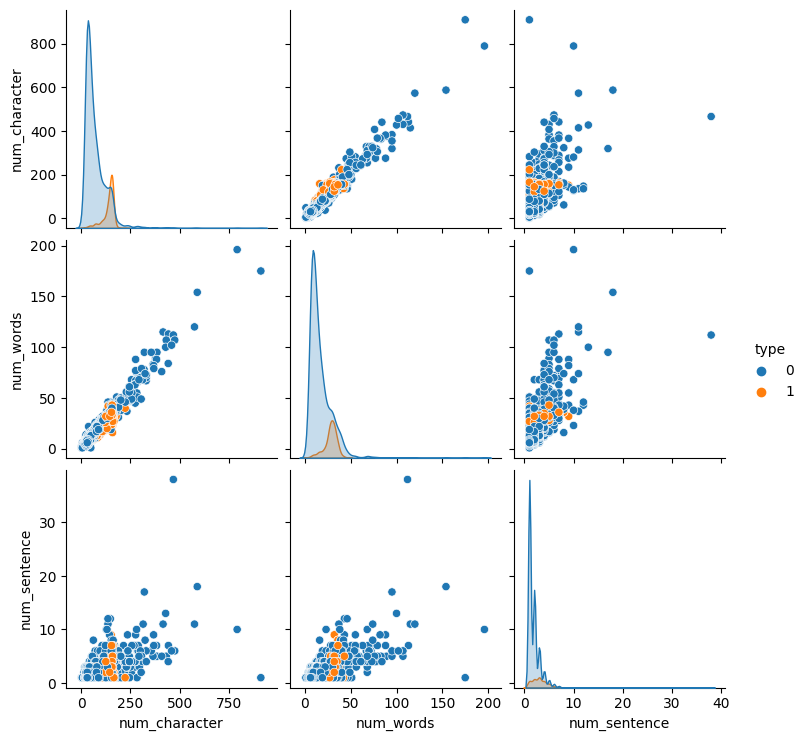

In [389]:
# we fisrt see which relation value to eachother
sns.pairplot(df,hue='type')

In [390]:
# correleaction
df.corr()

C:\Users\Laptop Point\AppData\Local\Temp\ipykernel_7284\1295459558.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,type,num_character,num_words,num_sentence
type,1.000000,0.389930,0.285128,0.264252
num_character,0.389930,1.000000,0.971874,0.616311
num_words,0.285128,0.971874,1.000000,0.661883
num_sentence,0.264252,0.616311,0.661883,1.000000


C:\Users\Laptop Point\AppData\Local\Temp\ipykernel_7284\1437554630.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

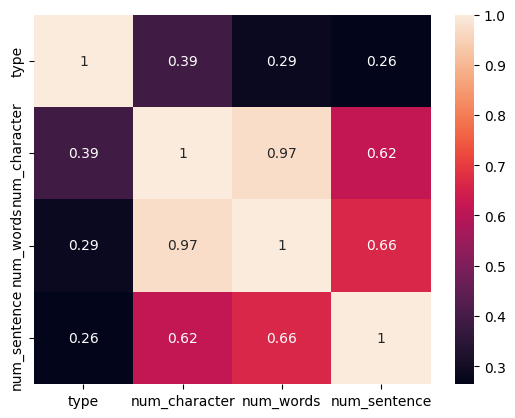

In [391]:
# corr in heat map to understand batter
sns.heatmap(df.corr(),annot=True)


# 3. Data preprocessing

In [392]:
# Data or Text preprocessing
# 1. Low case
# 2. Tokenization
# 3. Removal special characters
# 4. Remove stop words and punctuation
# 5. Stemming

In [393]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Laptop
[nltk_data]     Point\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [394]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [395]:
def transfrom_text(text):
    text = text.lower() # first step
    text = nltk.word_tokenize(text) # 2nd step
    y =[]
    for i in text: # 3rd step
        if i.isalnum():
            y.append(i)
    text = y[:] # step 4th 
    y.clear()
    for i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) 
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return" ".join(y)

In [396]:
transfrom_text("I Loved the yt luture on machine learning. How about you?")

'love yt lutur machin learn'

In [397]:

df["text"][1]

'K..give back my thanks.'

In [398]:
df['transfrom_text'] = df['text'].apply(transfrom_text)


C:\Users\Laptop Point\AppData\Local\Temp\ipykernel_7284\2232091376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transfrom_text'] = df['text'].apply(transfrom_text)


In [399]:
df

,type,text,num_character,num_words,num_sentence,transfrom_text
0,0,Hope you are having a good week. Just checking in,49,11,2,hope good week check
1,0,K..give back my thanks.,23,7,1,k give back thank
2,0,Am also doing in cbe only. But have to pay.,43,12,2,also cbe pay
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3,complimentari 4 star ibiza holiday cash need u...
4,1,okmail: Dear Dave this is your final notice to...,161,32,3,okmail dear dave final notic collect 4 tenerif...
...,...,...,...,...,...,...
5554,0,You are a great role model. You are giving so ...,245,61,4,great role model give much realli wish day mir...
5555,0,"Awesome, I remember the last time we got someb...",88,19,1,awesom rememb last time got somebodi high firs...
5556,1,"If you don't, your prize will go to another cu...",145,32,2,prize go anoth custom c polo ltd suit 373 lond...
5557,1,"SMS. ac JSco: Energy is high, but u may not kn...",154,36,7,sm ac jsco energi high u may know 2channel 2da...


In [400]:
from wordcloud import WordCloud

In [401]:
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white')

In [402]:
spam_wc = wc.generate(df[df['type']==1]['transfrom_text'].str.cat(sep=""))

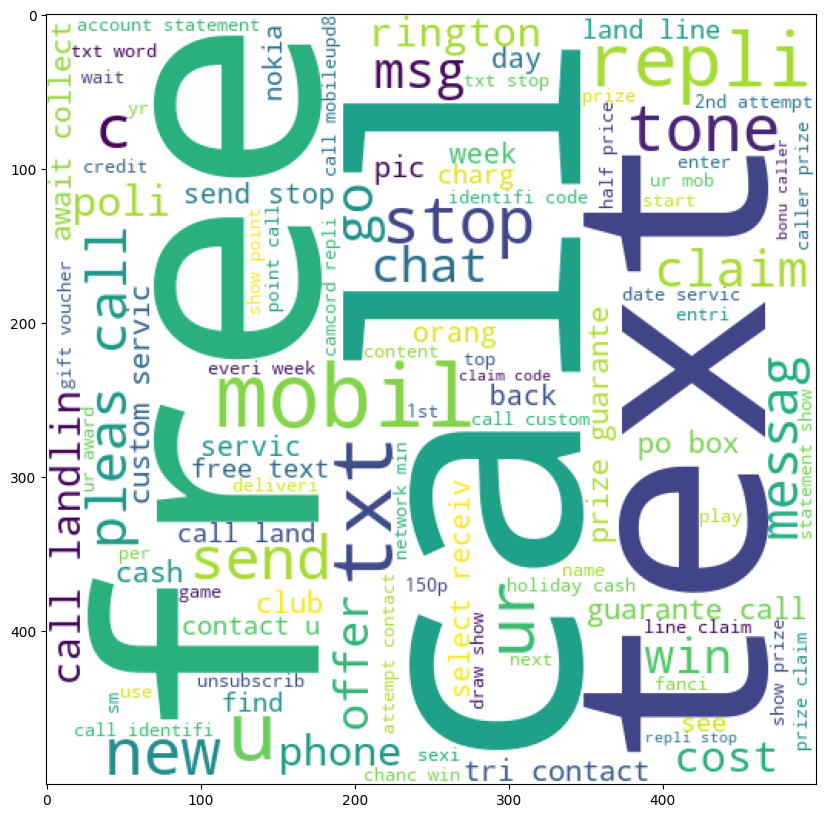

In [403]:
plt.figure(figsize=(12,10))
plt.imshow(spam_wc)
plt.show()

In [404]:
ham_wc = wc.generate(df[df['type']==0]['transfrom_text'].str.cat())

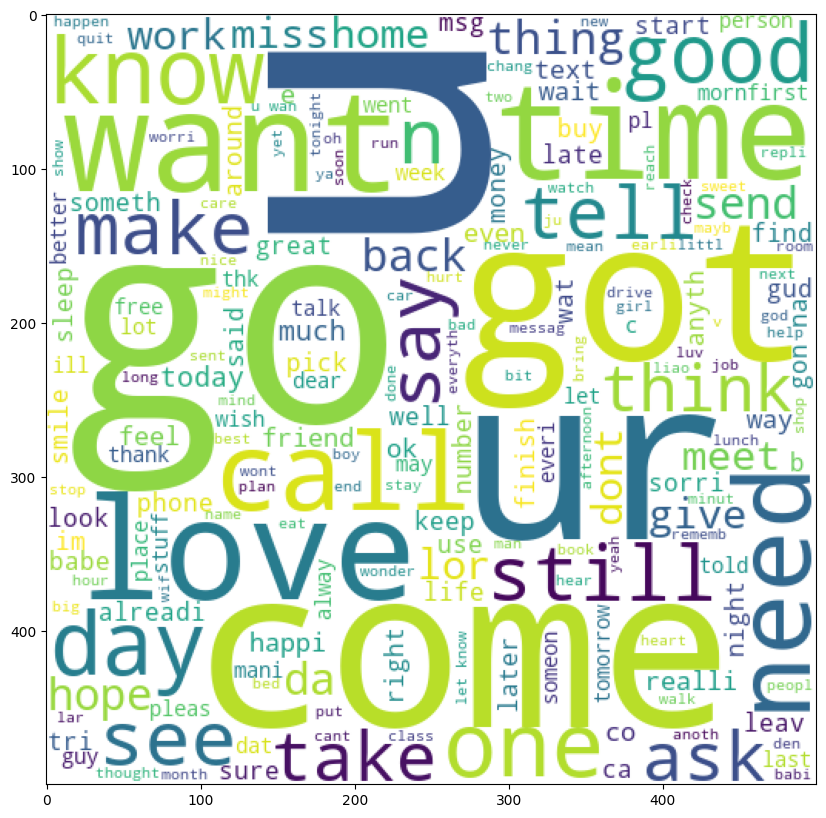

In [405]:
plt.figure(figsize=(12,10))
plt.imshow(ham_wc)
plt.show()

In [406]:
# how model is interpritalable
# we find top "30" words use in "ham" or "spam" massage

In [407]:
spam_corpus=[] 
for msg in df[df['type']==1]['transfrom_text'].to_list():# convert to list
    for word in msg.split():
        spam_corpus.append(word)

In [408]:
len(spam_corpus)

9978

In [409]:
from collections import Counter

In [410]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('ur', 119),
 ('u', 119),
 ('mobil', 114),
 ('stop', 108),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('servic', 64),
 ('new', 64),
 ('tone', 63),
 ('send', 61),
 ('urgent', 58),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('collect', 45),
 ('min', 45),
 ('c', 45)]

In [411]:
#same step with spam 
ham_corpus = []
for message in df[df['type']==0]['transfrom_text'].to_list():
    for word in message.split():
        ham_corpus.append(word)

In [412]:
len(ham_corpus)

35091

In [413]:
Counter(ham_corpus).most_common(30)

[('u', 1067),
 ('go', 407),
 ('get', 349),
 ('2', 286),
 ('come', 277),
 ('got', 239),
 ('know', 237),
 ('like', 236),
 ('call', 234),
 ('love', 219),
 ('time', 219),
 ('ok', 218),
 ('good', 216),
 ('want', 206),
 ('ur', 202),
 ('day', 197),
 ('need', 170),
 ('one', 166),
 ('4', 161),
 ('lor', 159),
 ('home', 152),
 ('think', 150),
 ('see', 148),
 ('still', 144),
 ('take', 143),
 ('da', 142),
 ('tell', 133),
 ('back', 127),
 ('say', 127),
 ('make', 127)]

In [414]:
import seaborn as sns

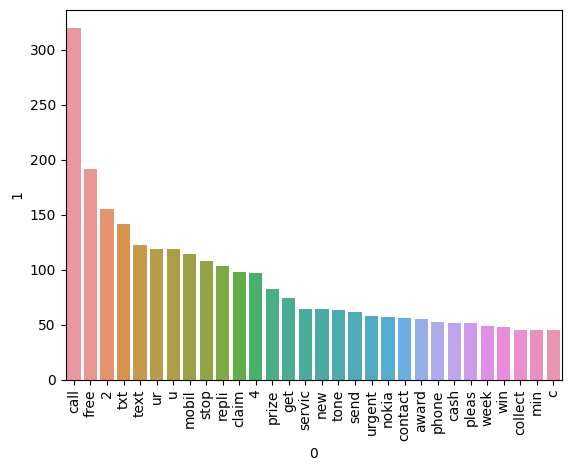

In [415]:
from collections import Counter
sns.barplot(x=(pd.DataFrame(Counter(spam_corpus).most_common(30))[0]),y=(pd.DataFrame(Counter(spam_corpus).most_common(30))[1]))
plt.xticks(rotation='vertical')
plt.show()

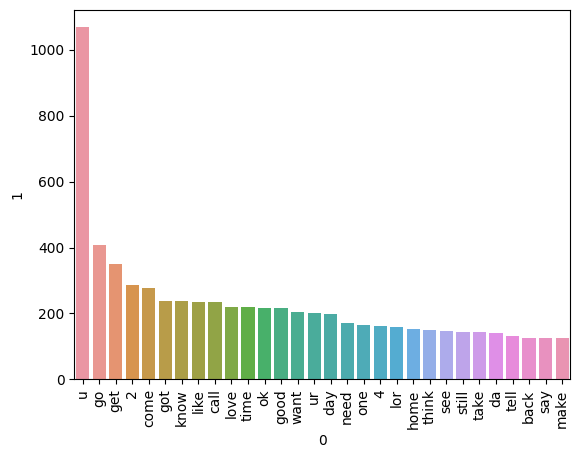

In [416]:
from collections import Counter
sns.barplot(x=(pd.DataFrame(Counter(ham_corpus).most_common(30))[0]),y=(pd.DataFrame(Counter(ham_corpus).most_common(30))[1]))
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [425]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv = CountVectorizer()
tf = TfidfTransformer()

In [429]:
X = tf.fit_transform(df['transfrom_text']).toarray()

ValueError: could not convert string to float: 'hope good week check'

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
X.shape


(5156, 6745)

In [ ]:
y = df['type'].values

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [ ]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [ ]:
gnb.fit(x_train,y_train)
ypred1 = gnb.predict(x_test)
print(accuracy_score(y_test,ypred1))
print(precision_score(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))

0.8527131782945736
0.46825396825396826
[[762 134]
 [ 18 118]]


In [ ]:
mnb.fit(x_train,y_train)
ypred2 = mnb.predict(x_test)
print(accuracy_score(y_test,ypred2))
print(confusion_matrix(y_test,ypred2))
print(precision_score(y_test,ypred2))

0.9748062015503876
[[880  16]
 [ 10 126]]
0.8873239436619719


In [ ]:
bnb.fit(x_train,y_train)
ypred3 = bnb.predict(x_test)
print(accuracy_score(y_test,ypred3))
print(confusion_matrix(y_test,ypred3))
print(precision_score(y_test,ypred3))

0.9670542635658915
[[894   2]
 [ 32 104]]
0.9811320754716981
